<a href="https://colab.research.google.com/github/Priyabrat845/Machine-Learning/blob/main/Assignment_Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b> Our task is to predict whether a message will be spam or not.We will be using TF-IDF vectorizer to find the vectors for the messages. </b>

### You will use <code>tfidfVectorizer</code>. It will convert collection of text documents (SMS corpus) into 2D matrix. One dimension represent documents and other dimension repesents each unique word in SMS corpus.

### If $n^{th}$ term $t$ has occured $p$ times in $m^{th}$ document, $(m, n)$ value in this matrix will be $\rm TF-IDF(t)$, where 
$\rm TF-IDF(t) = \rm Term ~Frequency (TF) * \rm Inverse~ Document ~Frequency (IDF)$
* ### <b>Term Frequency (TF)</b> is a measure of how frequent a term occurs in a document.

* ### $TF(t)$= Number of times term $t$ appears in document ($p$) / Total number of terms in that document

* ### <b>Inverse Document Frequency (IDF)</b> is measure of how important term is. For TF, all terms are equally treated. But, in IDF, for words that occur frequently like 'is' 'the' 'of' are assigned less weight. While terms that occur rarely that can easily help identify class of input features will be weighted high.

* ###  $IDF(t)= log(\frac{\rm Total ~ number ~ of ~document}{ Number ~of~ documents~ with ~term ~t ~in~ it})$

### At end we will have for every message, vectors normalized to unit length equal to size of vocabulary (number of unique terms from entire SMS corpus)





In [2]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
message = pd.read_csv('/content/drive/MyDrive/Rough works/spam.csv',encoding='latin-1')[['v1', 'v2']]
message.columns=['label', 'message']
message.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
message.shape

(5572, 2)

In [5]:
message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
message['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
message.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
# Adding another column to store the lengths of each messages.
message['length']=message['message'].apply(len)
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
message.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

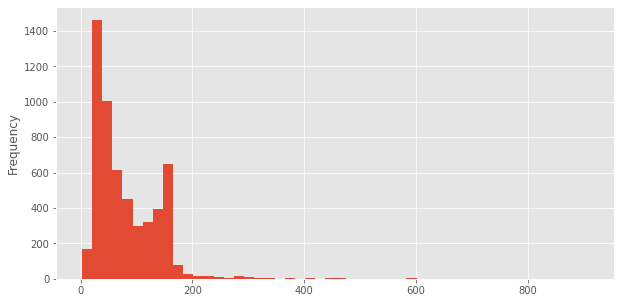

In [10]:
# Plotting the graph of various lengths.
message['length'].plot(bins=50,kind='hist',figsize=(10,5))

## **Text Pre-processing**

In [11]:
# Importing the library to remove the stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
import string
from nltk.corpus import stopwords

In [13]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [14]:
# writting a function which removes punctuation and stopwords from our data
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [15]:
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


**Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens.**

In [16]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [17]:
message['tokenized_message']=message['message'].apply(text_process)
message.head()

,label,message,length,tokenized_message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 Text FA 87121 receive entry questionstd txt rateTCs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,49,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,Nah dont think goes usf lives around though


## **tfidfVectorizer**

**You will use tfidfVectorizer. It will convert collection of text documents (SMS corpus) into 2D matrix.** 

**One dimension represent documents and other dimension repesents each unique word in SMS corpus.**

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer=TfidfVectorizer(max_df=0.9,min_df=10)
X=vectorizer.fit_transform(message['tokenized_message'])

In [20]:
# converting X into an array
X.toarray()[4560]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.36644381, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [21]:
X.toarray().shape

(5572, 872)

In [22]:
sum(X.toarray()[4560])

3.1061993467941194

## **Training a model**

In [23]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(message['tokenized_message'],message['label'],test_size=0.2)

In [24]:
msg_train.head()

3253    make lasagna vodka                                                                                                
1784    Dont search love let love find U Thats called falling love bcoz U dont force U fall U know smeone hold U BSLVYL   
4456    Aight plan come later tonight                                                                                     
4254    Block Breaker comes deluxe format new features great graphics TMobile Buy å£5 replying GET BBDELUXE take challenge
5206    reach ur home ltgt minutes                                                                                        
Name: tokenized_message, dtype: object

With messages represented as vectors, we can finally train our spam/ham classifier. Now we can use Naive Bayes Classifier to perform this classification task

In [25]:
train_vectorized = vectorizer.transform(msg_train)
test_vectorized = vectorizer.transform(msg_test)

In [26]:
train_vectorized

<4457x872 sparse matrix of type '<class 'numpy.float64'>'
	with 24347 stored elements in Compressed Sparse Row format>

In [27]:
train_array= train_vectorized.toarray()
test_array = test_vectorized.toarray()

In [28]:
from sklearn.naive_bayes import GaussianNB
spam_detect_model=GaussianNB().fit(train_array,label_train)

In [29]:
train_preds = spam_detect_model.predict(train_array)
test_preds = spam_detect_model.predict(test_array)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
# Confusion matrices for train and test 
print(confusion_matrix(label_train,train_preds))
print(confusion_matrix(label_test,test_preds))

[[3016  853]
 [   0  588]]
[[727 229]
 [ 16 143]]


In [32]:
# Print the classification report for train and test
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

         ham       1.00      0.78      0.88      3869
        spam       0.41      1.00      0.58       588

    accuracy                           0.81      4457
   macro avg       0.70      0.89      0.73      4457
weighted avg       0.92      0.81      0.84      4457



              precision    recall  f1-score   support

         ham       0.98      0.76      0.86       956
        spam       0.38      0.90      0.54       159

    accuracy                           0.78      1115
   macro avg       0.68      0.83      0.70      1115
weighted avg       0.89      0.78      0.81      1115

